In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import pymorphy3
import math
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neekeka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stopWords = stopwords.words("russian")

morph = pymorphy3.MorphAnalyzer(lang='ru')

In [4]:
def delete_stop_words(text):
    return [word for word in text if word not in stopWords]

def format_data(text):
    fmtTextStr = re.sub(r'[^\w\s]', ' ', text.lower(), flags=re.UNICODE)
    tokenTextArr = nltk.word_tokenize(fmtTextStr)
    cleanTextArr = delete_stop_words(tokenTextArr)
    return " ".join(cleanTextArr)

In [5]:
def get_normalFormStr(line):
    return " ".join([morph.parse(word)[0].normal_form for word in line.split() if morph.parse(word)[0].normal_form not in stopWords])

In [6]:
df = pd.read_csv('./kinopoisk-top250.csv')
df = df.rename(columns={'overview': 'text'})
df.head(10)

,rating,movie,year,country,rating_ball,text,director,screenwriter,actors,url_logo
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...
5,5,Начало,2010,США,8.662,Кобб — талантливый вор; лучший из лучших в опа...,Кристофер Нолан,Кристофер Нолан,Леонардо ДиКаприо; Джозеф Гордон-Левитт; Эллен...,'https://st.kp.yandex.net/images/film_iphone/i...
6,6,Леон,1994,Франция,8.681,Профессиональный убийца Леон; не знающий пощад...,Люк Бессон,Люк Бессон,Жан Рено; Гари Олдман; Натали Портман; Дэнни А...,'https://st.kp.yandex.net/images/film_iphone/i...
7,7,Король Лев,1994,США,8.772,У величественного Короля-Льва Муфасы рождается...,Роджер Аллерс; Роб Минкофф,Ирен Меччи; Джонатан Робертс; Линда Вулверт...,Мэттью Бродерик; Джереми Айронс; Нэйтан Лейн; ...,'https://st.kp.yandex.net/images/film_iphone/i...
8,8,Бойцовский клуб,1999,США,8.645,Сотрудник страховой компании страдает хроничес...,Дэвид Финчер,Джим Улс; Чак Паланик,Эдвард Нортон; Брэд Питт; Хелена Бонем Картер;...,'https://st.kp.yandex.net/images/film_iphone/i...
9,9,Иван Васильевич меняет профессию,1973,СССР,8.782,Инженер-изобретатель Тимофеев сконструировал м...,Леонид Гайдай,Владлен Бахнов; Леонид Гайдай; Михаил Булгаков,Александр Демьяненко; Юрий Яковлев; Леонид Кур...,'https://st.kp.yandex.net/images/film_iphone/i...


In [7]:
df["formated"] = df.text.apply(lambda text: get_normalFormStr(format_data(text)))
df["formated_withoutMorph"] = df.text.apply(lambda text: format_data(text))

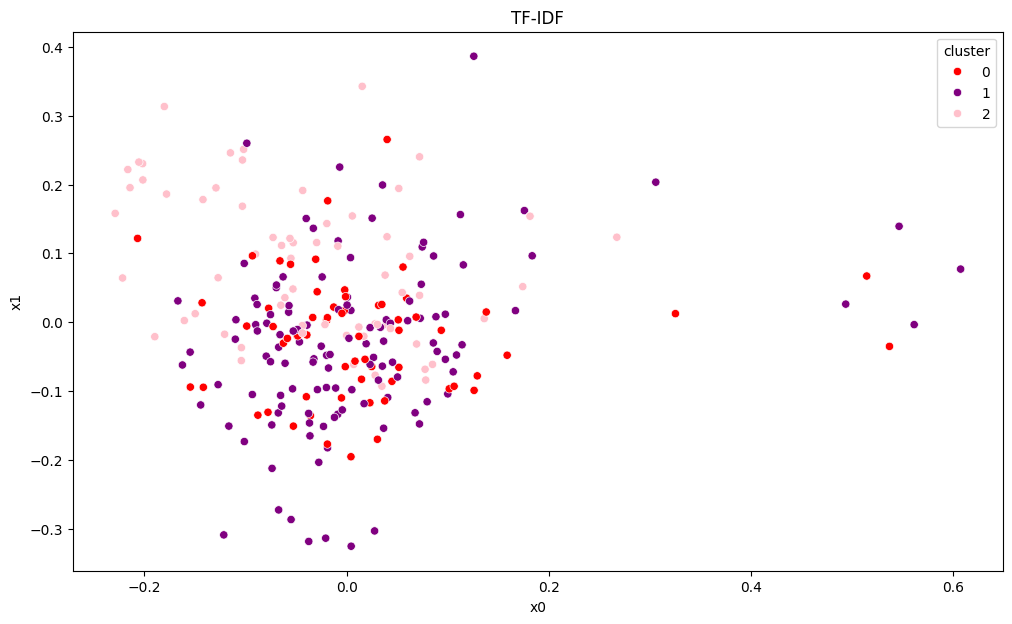

0.53
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        21
           1       0.57      0.61      0.59        49
           2       0.48      0.43      0.46        30

    accuracy                           0.53       100
   macro avg       0.52      0.51      0.51       100
weighted avg       0.53      0.53      0.53       100



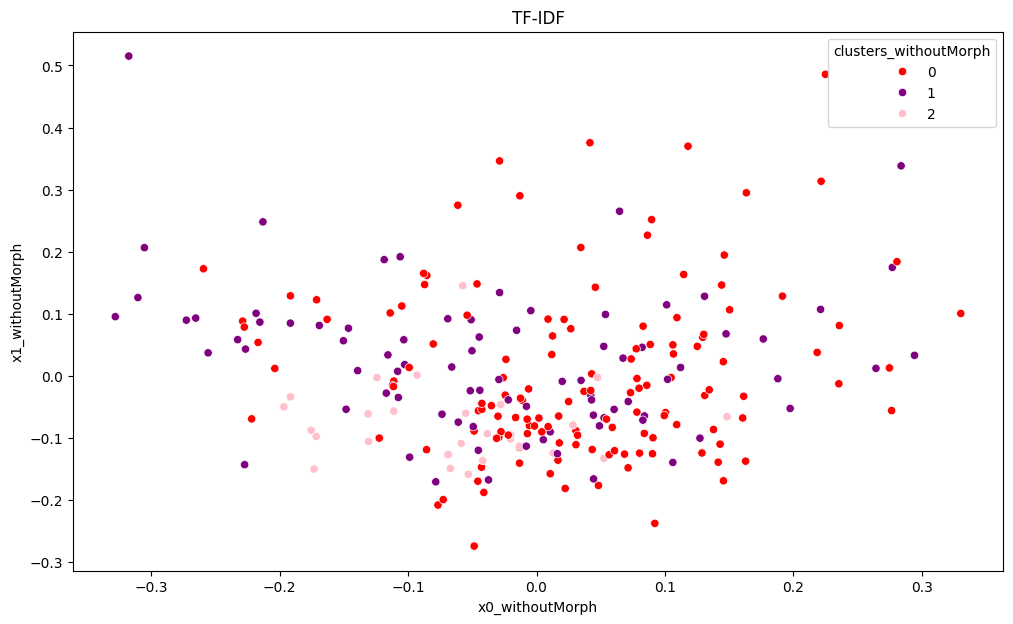

0.7
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        56
           1       0.65      0.73      0.69        33
           2       0.50      0.36      0.42        11

    accuracy                           0.70       100
   macro avg       0.64      0.61      0.62       100
weighted avg       0.70      0.70      0.70       100



In [8]:
def _getVectorizer(fieldName):
    vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
    x = vectorizer.fit_transform(df[fieldName])
    return x

def _getClusters(x, fieldName):
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(x)
    clusters = kmeans.labels_
    df[fieldName] = clusters

def _pca(x, fieldX0, fieldX1, fieldCluster):
    pca = PCA(n_components=2, random_state=42)
    pca_vecs = pca.fit_transform(x.toarray())
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]

    df[fieldX0] = x0
    df[fieldX1] = x1

    plt.figure(figsize=(12, 7))
    plt.title("TF-IDF")
    plt.xlabel(fieldX0)
    plt.ylabel(fieldX1)
    sns.scatterplot(data=df, x=fieldX0, y=fieldX1, hue=fieldCluster, palette=['red', 'purple', 'pink'])
    plt.show()

def _calcAccuracy(x, fieldCluster):
    XVectorDf = pd.DataFrame(x.toarray())
    xTraining, xTest, yTraining, yTest = train_test_split(XVectorDf, df[fieldCluster], test_size = 0.4, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='minkowski')
    knn.fit(xTraining, yTraining)
    predictions = knn.predict(xTest).tolist()

    print(accuracy_score(yTest, predictions))
    print(classification_report(yTest, predictions))


def processTfIdf(fieldData, fieldCluster, fieldX0, fieldX1):
    X = _getVectorizer(fieldData)
    _getClusters(X, fieldCluster)
    _pca(X, fieldX0, fieldX1, fieldCluster)
    _calcAccuracy(X, fieldCluster)
    


processTfIdf('formated', 'cluster', "x0", "x1")
processTfIdf('formated_withoutMorph', 'clusters_withoutMorph', "x0_withoutMorph", "x1_withoutMorph")

### Word2Vec

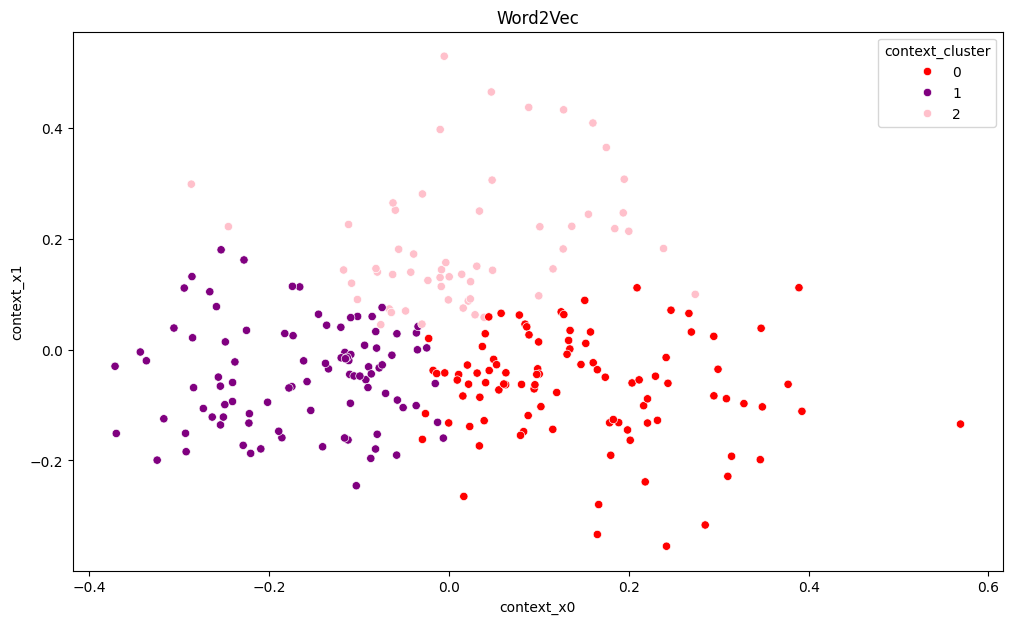

0.88
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.88      0.95      0.91        38
           2       0.75      0.75      0.75        20

    accuracy                           0.88       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.88      0.88      0.88       100



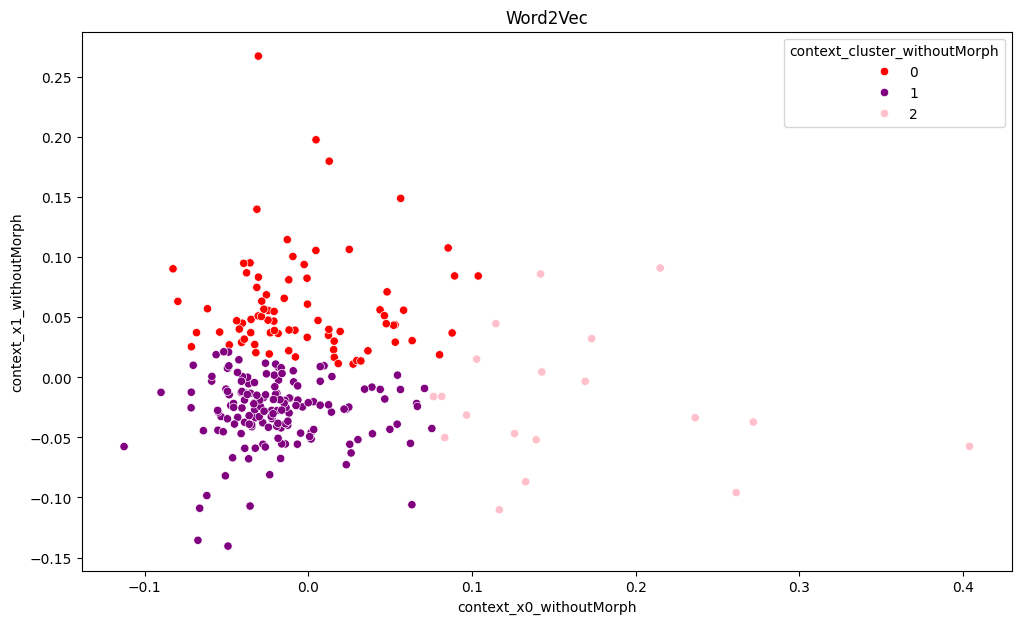

0.91
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.91      0.97      0.94        63
           2       1.00      0.67      0.80         6

    accuracy                           0.91       100
   macro avg       0.94      0.82      0.87       100
weighted avg       0.91      0.91      0.91       100



In [11]:
def _get_w2vdf(fieldData):
    w2v_df = pd.DataFrame(df[fieldData]).values.tolist()
    for i in range(len(w2v_df)):
        w2v_df[i] = w2v_df[i][0].split(" ")
    return w2v_df

def _train_w2v(w2v_df):
    w2v_model = Word2Vec(min_count=1, vector_size =100)
    
    w2v_model.build_vocab(w2v_df)
    w2v_model.train(w2v_df, total_examples=w2v_model.corpus_count, epochs=100, report_delay=1)
    return w2v_model

def _preprocess(s):
    return [i for i in s.split()]

def _get_vector(s, model):
    return np.sum(np.array([model.wv[i] for i in _preprocess(s)]), axis=0)

def _pcaContext(x, fieldX0, fieldX1, fieldCluster):
    pca = PCA(n_components=2, random_state=42)
    pca_vecs = pca.fit_transform(x)
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]


    df[fieldX0] = x0
    df[fieldX1] = x1

    plt.figure(figsize=(12, 7))
    plt.title("Word2Vec")
    plt.xlabel(fieldX0)
    plt.ylabel(fieldX1)
    sns.scatterplot(data=df, x=fieldX0, y=fieldX1, hue=fieldCluster, palette=['red', 'purple', 'pink'])
    plt.show()

def _calcAccuracyContext(x, fieldCluster):
    XVectorDf = pd.DataFrame(x)
    xTraining, xTest, yTraining, yTest = train_test_split(XVectorDf, df[fieldCluster], test_size = 0.4, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='minkowski')
    knn.fit(xTraining, yTraining)
    predictions = knn.predict(xTest).tolist()

    print(accuracy_score(yTest, predictions))
    print(classification_report(yTest, predictions))


def processContex(fieldData, fieldCluster, fieldX0, fieldX1):
    w2v_df = _get_w2vdf(fieldData)
    w2v_model = _train_w2v(w2v_df)

    x = [_get_vector(text, w2v_model) for text in df[fieldData]]
    x = normalize(x)

    _getClusters(x, fieldCluster)
    _pcaContext(x, fieldX0, fieldX1, fieldCluster)
    _calcAccuracyContext(x, fieldCluster)

processContex("formated", "context_cluster", "context_x0", "context_x1")
processContex("formated_withoutMorph", "context_cluster_withoutMorph", "context_x0_withoutMorph", "context_x1_withoutMorph")

In [15]:
df[['formated', 'formated_withoutMorph', 'cluster', 'x0', 'x1', 'clusters_withoutMorph', 'x0_withoutMorph', 'x1_withoutMorph', 'context_cluster', 'context_x0', 'context_x1', 'context_cluster_withoutMorph', 'context_x0_withoutMorph', 'context_x1_withoutMorph']]

,formated,formated_withoutMorph,cluster,x0,x1,clusters_withoutMorph,x0_withoutMorph,x1_withoutMorph,context_cluster,context_x0,context_x1,context_cluster_withoutMorph,context_x0_withoutMorph,context_x1_withoutMorph
0,бухгалтер энди дюфрейн обвинить убийство собст...,бухгалтер энди дюфрейн обвинён убийстве собств...,0,-0.035872,-0.135655,2,-0.191581,-0.033662,1,-0.240703,-0.093417,0,-0.032054,0.020513
1,пол эджкомба начальник блок смертник тюрьма хо...,пол эджкомб начальник блока смертников тюрьме ...,1,-0.057396,0.014637,0,0.078165,-0.058283,2,-0.008506,0.114317,1,0.070994,-0.009286
2,лицо главное герой форрест гампа слабоумный бе...,лица главного героя форреста гампа слабоумного...,0,-0.065991,0.089109,0,0.089630,0.251730,0,0.231948,-0.127441,2,0.114609,0.044596
3,фильм рассказывать реальный история загадочный...,фильм рассказывает реальную историю загадочног...,2,-0.055146,0.092854,1,0.294300,0.033195,0,0.568968,-0.134237,2,0.403976,-0.057479
4,пострадать результат несчастный случай богатый...,пострадав результате несчастного случая богаты...,1,-0.067252,-0.036196,1,0.052373,0.047608,1,-0.173300,0.025486,1,-0.036523,-0.005405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,тед крамер целиком посвятить карьера замечать ...,тед крамер целиком посвятив карьере замечает п...,1,-0.055006,-0.286465,1,-0.007982,-0.113091,1,-0.220490,-0.187172,1,-0.018476,-0.050755
246,новый приключение джек воробей друг уилла терн...,новые приключения джека воробья друзей уилла т...,2,0.181311,0.153948,2,-0.175586,-0.087313,2,-0.005196,0.530305,0,-0.061626,0.057057
247,флера шестнадцатилетний мальчишка откопать сре...,флера шестнадцатилетний мальчишка откопавший с...,0,-0.058675,-0.023447,0,0.274796,0.012945,0,0.220845,-0.132316,1,0.000805,-0.049251
248,убить президент африканский республика задание...,убить президента африканской республики такое ...,0,-0.001406,-0.064459,0,0.078231,-0.004134,0,0.119906,-0.077135,1,0.003302,-0.043458
